In [752]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Loading Training Data**

In [753]:
data = pd.read_csv('/content/train_v9rqX0R.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [754]:
# TRAIN DATASET STATISTICS
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [755]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [756]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**EDA Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


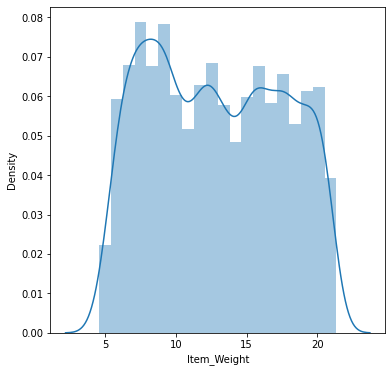

In [757]:
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Weight'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


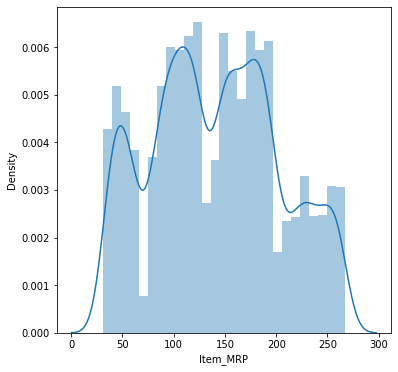

In [758]:
plt.figure(figsize=(6,6))
sns.distplot(data['Item_MRP'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


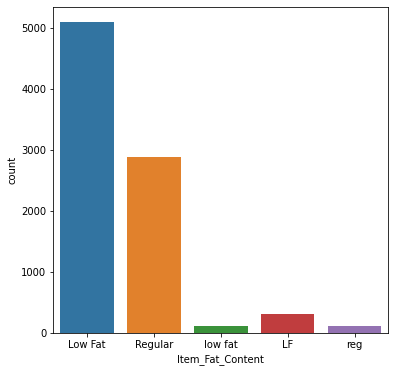

In [759]:
plt.figure(figsize=(6,6))
sns.countplot(data['Item_Fat_Content'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


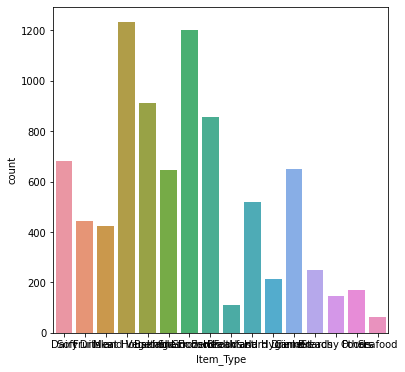

In [760]:
plt.figure(figsize=(6,6))
sns.countplot(data['Item_Type'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


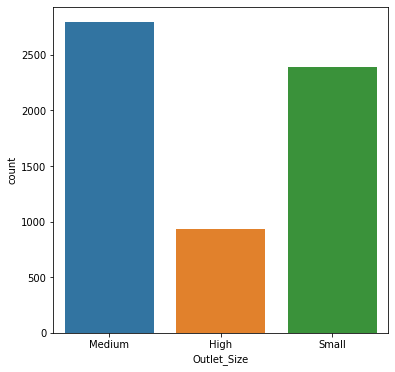

In [761]:
plt.figure(figsize=(6,6))
sns.countplot(data['Outlet_Size'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


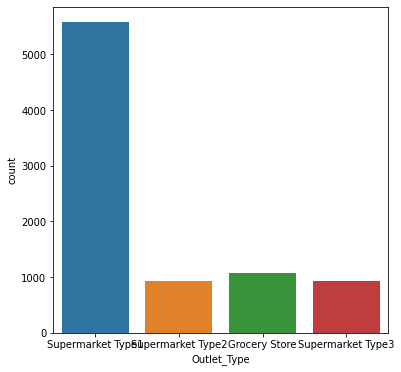

In [762]:
plt.figure(figsize=(6,6))
sns.countplot(data['Outlet_Type'])
plt.show()

**Preprocessing of Training Data**

In [763]:
#Checking for null values
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [764]:
#checking datatypes
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [765]:
data.dtypes.index

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [766]:
#Finding mean of item weight for each group of items 
itemweight_mean = data.pivot_table(values = 'Item_Weight', index = 'Item_Identifier')
itemweight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [767]:
#identifing the rows with null values 
miss_bool = data['Item_Weight'].isnull()

In [768]:
#Replacing the null values in item weight column with respective mean values
for i, item in enumerate(data['Item_Identifier']):
  if miss_bool[i]:
    if item in itemweight_mean:
      data['Item_weight'][i] =itemweight_mean.loc[item]['Item_Weight']
    else:
      data['Item_Weight'][i] = np.mean(data['Item_Weight'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [769]:
#Finding the mode for the categorical column 'Outlet Size' based on respective outlet type
outlet_size_mode = data.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [770]:
#Replacing the null values in Outlet size column with respective mode values
miss_bool_os = data['Outlet_Size'].isnull()
data.loc[miss_bool_os, 'Outlet_Size'] = data.loc[miss_bool_os,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])


In [771]:
#Checking for null values again
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [772]:
#Replacing the repeated values 
data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

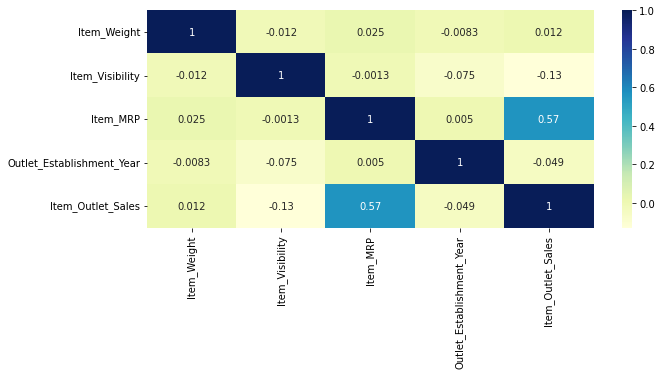

In [773]:
#Finding the correlation between feature variables and target variable
corrmatrix = data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,annot=True,cmap='YlGnBu')

In [774]:
#OneHotEncoding of categorical columns
data1 = pd.get_dummies(data, columns = ['Item_Fat_Content','Item_Type','Outlet_Size', 'Outlet_Location_Type','Outlet_Type'])
data1.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.000000,182.0950,OUT010,1998,732.3800,0,1,0,...,0,0,1,0,0,1,1,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,1987,994.7052,1,0,0,...,1,0,0,0,0,1,0,1,0,0


**Loading Test Dataset**

In [775]:
data_test = pd.read_csv('/content/test_AbJTz2l.csv')
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


**Preprocessing Test Data**

In [776]:
data_test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [777]:
#Finding mean of item weight for each group of items 
itemweight_mean_test = data_test.pivot_table(values = 'Item_Weight', index = 'Item_Identifier')
itemweight_mean_test

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [778]:
#identifing the rows with null values 
miss_bool = data_test['Item_Weight'].isnull()

In [779]:
#Replacing the null values in item weight column with respective mean values
for i, item in enumerate(data_test['Item_Identifier']):
  if miss_bool[i]:
    if item in itemweight_mean_test:
      data_test['Item_weight'][i] =itemweight_mean_test.loc[item]['Item_Weight']
    else:
      data_test['Item_Weight'][i] = np.mean(data_test['Item_Weight'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [780]:
#Finding the mode for the categorical column 'Outlet Size' based on respective outlet type
outlet_size_mode_test = data_test.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode_test

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [781]:
#Replacing the null values in Outlet size column with respective mode values
miss_bool_test = data_test['Outlet_Size'].isnull()
data_test.loc[miss_bool_test, 'Outlet_Size'] = data_test.loc[miss_bool_test,'Outlet_Type'].apply(lambda x: outlet_size_mode_test[x])


In [782]:
#Checking for null values again
data_test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [783]:
#Replacing the repeated values 
data_test.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
data_test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [784]:
#OneHotEncoding of test data
data_test1 = pd.get_dummies(data_test, columns = ['Item_Fat_Content','Item_Type','Outlet_Size', 'Outlet_Location_Type','Outlet_Type'])


**Linear Regression Model Fitting and Training**

In [785]:
#Splitting of test data
x = data1.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Outlet_Sales'],axis = 1)
y = data1['Item_Outlet_Sales']


In [786]:
from sklearn.model_selection import train_test_split


In [787]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [788]:
from sklearn.linear_model import LinearRegression


In [789]:
lr = LinearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)

In [790]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [791]:
print('Mean squared is: ', mean_squared_error(y_test, predictions))
print('R squared value is ;', r2_score(y_test,predictions))

Mean squared is:  1148940.7060845583
R squared value is ; 0.5772798530063512


**Lasso Regression**

In [792]:
from sklearn.linear_model import Lasso

In [793]:
lasso = Lasso(alpha=1.0)

In [794]:
x = data1.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Outlet_Sales'],axis = 1)
y = data1['Item_Outlet_Sales']

In [795]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [796]:
m1 = lasso.fit(x_train, y_train)

In [797]:
lasso.score(x_test, y_test), lasso.score(x_train, y_train)

(0.5784699135705715, 0.5585110362102623)

In [798]:
lasso.coef_

array([-1.60882292e+00, -6.12857201e+01,  1.56598693e+01, -4.43383916e+01,
        2.96643100e-14,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        1.55246632e+01, -7.65200279e+01, -0.00000000e+00,  3.82667511e+01,
        0.00000000e+00,  4.40976181e+00, -1.16697122e+00,  0.00000000e+00,
       -0.00000000e+00,  8.36776103e+01, -0.00000000e+00, -6.22221179e+00,
        0.00000000e+00,  0.00000000e+00,  4.73931147e+00, -1.00484241e+02,
        0.00000000e+00,  6.85076508e+01, -1.55613329e+01, -1.88994718e+03,
        0.00000000e+00, -3.46442283e+02,  1.35939848e+03])

In [799]:
prediction_lasso = m1.predict(x_test)

In [800]:
print('MSE =',mean_squared_error(y_test,prediction_lasso))

MSE = 1145706.1570935464


In [801]:
from sklearn.metrics import r2_score
print('R squared value is :', r2_score(y_test,prediction_lasso))

R squared value is : 0.5784699135705715


**Testing Test Dataset**

In [802]:
z =  data_test1.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis = 1)

In [803]:
predictions_test = model.predict(z)
predictions_test

array([1834.18768496, 1442.8376004 , 1841.94835126, ..., 1973.1858884 ,
       3557.55092666, 1406.78637407])

In [804]:
data_test_result = data_test.drop(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility','Item_Type', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type'],axis=1)
data_test_result.head()

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027


In [805]:
data_test_result['Item_Outlet_Sales'] = predictions_test
data_test_result.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1834.187685
1,FDW14,OUT017,1442.837600
2,NCN55,OUT010,1841.948351
3,FDQ58,OUT017,2550.365424
4,FDY38,OUT027,5083.866991


In [806]:
data_test_result.to_csv('Sanjay_BigMart.csv')
submission_data = pd.read_csv('/content/Sanjay_BigMart.csv')
submission_data.head()

,Unnamed: 0,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,0,FDW58,OUT049,1834.187685
1,1,FDW14,OUT017,1442.837600
2,2,NCN55,OUT010,1841.948351
3,3,FDQ58,OUT017,2550.365424
4,4,FDY38,OUT027,5083.866991


**Min_Max Scaling**

In [807]:
from sklearn.preprocessing import MinMaxScaler

In [808]:
mms = MinMaxScaler()

In [809]:
data1[['Item_Weight','Item_MRP']] = mms.fit_transform(data[['Item_Weight','Item_MRP']])
data1.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,0.282525,0.016047,0.927507,OUT049,1999,3735.1380,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,DRC01,0.081274,0.019278,0.072068,OUT018,2009,443.4228,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,FDN15,0.770765,0.016760,0.468288,OUT049,1999,2097.2700,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,FDX07,0.871986,0.000000,0.640093,OUT010,1998,732.3800,0,1,0,...,0,0,1,0,0,1,1,0,0,0
4,NCD19,0.260494,0.000000,0.095805,OUT013,1987,994.7052,1,0,0,...,1,0,0,0,0,1,0,1,0,0


In [810]:
#Splitting of test data
x = data1.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Outlet_Sales'],axis = 1)
y = data1['Item_Outlet_Sales']

In [811]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [812]:
lr = LinearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)

In [813]:
print('Mean squared is: ', mean_squared_error(y_test, predictions))
print('R squared value is ;', r2_score(y_test,predictions))

Mean squared is:  1148929.0151125186
R squared value is ; 0.5772841543679385
